C=0.001: Mean Accuracy = 0.92
C=0.01: Mean Accuracy = 0.97
C=0.1: Mean Accuracy = 0.99
C=1: Mean Accuracy = 1.00
C=10: Mean Accuracy = 1.00


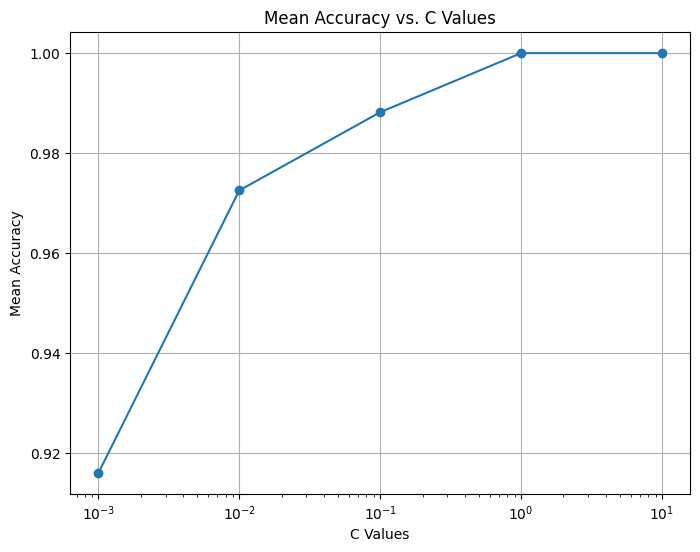

In [379]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.utils import resample


def loading_data():
    # x train
    custom_column_names = ["instance", "feature", "value"]
    df_train_x = pd.read_csv("train_X.csv", names=custom_column_names)
    df_pivot = df_train_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot["instance"] = df_pivot["instance"]
    # y train
    custom_Y_names = ["poisonous"]
    df_train_Y = pd.read_csv("train_Y.csv", names=custom_Y_names)

    # x test
    df_test_x = pd.read_csv("test_X.csv", names=custom_column_names)
    df_pivot_test = df_test_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot_test.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot_test.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot_test.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot_test["instance"] = df_pivot_test["instance"]

    # y test

    df_test_Y = pd.read_csv("test_Y.csv", names=custom_Y_names)

    # drop instance column
    df_pivot.drop('instance', axis=1, inplace=True)
    df_pivot_test.drop('instance', axis=1, inplace=True)

    return df_pivot, df_train_Y, df_pivot_test, df_test_Y


def SVM_l2_regularization_Kfold(x_train, y_train):
    class_weights = {-1: 1, 1: 5}

    k = 5  # Number of folds for cross-validation
    C_values = [0.001, 0.01, 0.1, 1, 10]
    mean_scores = []

    for c in C_values:
        svm_classifier = SVC(kernel='linear', C=c, class_weight=class_weights)
        kf = KFold(n_splits=k)
        scores = cross_val_score(svm_classifier, x_train, y_train, cv=kf)
        mean_accuracy = np.mean(scores)
        mean_scores.append(mean_accuracy)
        print(f'C={c}: Mean Accuracy = {mean_accuracy:.2f}')
    plt.figure(figsize=(8, 6))
    plt.plot(C_values, mean_scores, marker='o', linestyle='-')
    plt.title("Mean Accuracy vs. C Values")
    plt.xlabel("C Values")
    plt.ylabel("Mean Accuracy")
    plt.xscale('log')  # Use a log scale for the x-axis if C values vary widely
    plt.grid(True)
    plt.show()
    return mean_scores


def SVM_Prediction(x_train, y_train, x_test, y_test):
    class_weights = {-1: 1, 1: 5}
    svm_classifier = SVC(kernel='linear', C=0.01, class_weight=class_weights)
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(x_test)

    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    plt.figure(figsize=(8, 6))

    feature_names = x_train.columns

    coefficients = svm_classifier.coef_

    feature_coefficients = dict(zip(feature_names, coefficients[0]))  # Use coefficients[0] for class -1

    print(feature_coefficients)
    return feature_coefficients


def Lasso_Regularization(x_train, y_train, x_test, y_test):
    alpha = 0.01  # Adjust the regularization strength
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    selected_features = [feature for feature, coef in enumerate(lasso.coef_) if coef != 0]
    print(f'Selected features: {selected_features}')
    X_selected = x_train[:, selected_features]
    return X_selected


def BoLasso(x_train, y_train, alpha=0.01):
    n_bootstraps = 1000
    selected_features = []

    for _ in range(n_bootstraps):
        # Generate a bootstrap sample
        X_boot, y_boot = resample(x_train, y_train, random_state=np.random.randint(0, 100))

        # Fit a Lasso regression model
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_boot, y_boot)
        selected_indices = np.where(lasso.coef_ != 0)[0]
        selected_features.append(selected_indices)

    feature_selection_count = np.bincount(np.concatenate(selected_features))

    threshold = n_bootstraps // 2
    final_selected_features = np.where(feature_selection_count >= threshold)[0]

    print("Selected Features:", final_selected_features)
    X_selected = x_train.iloc[:, final_selected_features]
    return final_selected_features, X_selected


def main():
    x_train, y_train, x_test, y_test = loading_data()
    y_train = y_train.values.ravel()
    # extra_columns_in_train = [col for col in x_train.columns if col not in x_test.columns]
    # for col in extra_columns_in_train:
    #     x_test[col] = 0
    mean_scores = SVM_l2_regularization_Kfold(x_train, y_train)


if __name__ == "__main__":
    main()


In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.utils import resample


def loading_data():
    # x train
    custom_column_names = ["instance", "feature", "value"]
    df_train_x = pd.read_csv("train_X.csv", names=custom_column_names)
    df_pivot = df_train_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot["instance"] = df_pivot["instance"]
    # y train
    custom_Y_names = ["poisonous"]
    df_train_Y = pd.read_csv("train_Y.csv", names=custom_Y_names)

    # x test
    df_test_x = pd.read_csv("test_X.csv", names=custom_column_names)
    df_pivot_test = df_test_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot_test.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot_test.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot_test.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot_test["instance"] = df_pivot_test["instance"]

    # y test

    df_test_Y = pd.read_csv("test_Y.csv", names=custom_Y_names)

    # drop instance column
    df_pivot.drop('instance', axis=1, inplace=True)
    df_pivot_test.drop('instance', axis=1, inplace=True)

    return df_pivot, df_train_Y, df_pivot_test, df_test_Y


def SVM_l2_regularization_Kfold(x_train, y_train):
    class_weights = {-1: 1, 1: 5}

    k = 5  # Number of folds for cross-validation
    C_values = [0.001, 0.01, 0.1, 1, 10]
    mean_scores = []

    for c in C_values:
        svm_classifier = SVC(kernel='linear', C=c, class_weight=class_weights)
        kf = KFold(n_splits=k)
        scores = cross_val_score(svm_classifier, x_train, y_train, cv=kf)
        mean_accuracy = np.mean(scores)
        mean_scores.append(mean_accuracy)
        print(f'C={c}: Mean Accuracy = {mean_accuracy:.2f}')
    plt.figure(figsize=(8, 6))
    plt.plot(C_values, mean_scores, marker='o', linestyle='-')
    plt.title("Mean Accuracy vs. C Values")
    plt.xlabel("C Values")
    plt.ylabel("Mean Accuracy")
    plt.xscale('log')  # Use a log scale for the x-axis if C values vary widely
    plt.grid(True)
    plt.show()
    return mean_scores


def SVM_Prediction(x_train, y_train, x_test, y_test):
    class_weights = {-1: 1, 1: 5}
    svm_classifier = SVC(kernel='linear', C=0.01, class_weight=class_weights)
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(x_test)

    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    plt.figure(figsize=(8, 6))

    feature_names = x_train.columns

    coefficients = svm_classifier.coef_

    feature_coefficients = dict(zip(feature_names, coefficients[0]))  # Use coefficients[0] for class -1

    print(feature_coefficients)
    return feature_coefficients


def Lasso_Regularization(x_train, y_train, x_test, y_test):
    alpha = 0.01  # Adjust the regularization strength
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    selected_features = [feature for feature, coef in enumerate(lasso.coef_) if coef != 0]
    print(f'Selected features: {selected_features}')
    X_selected = x_train[:, selected_features]
    return X_selected


def BoLasso(x_train, y_train, alpha=0.01):
    n_bootstraps = 1000
    selected_features = []

    for _ in range(n_bootstraps):
        # Generate a bootstrap sample
        X_boot, y_boot = resample(x_train, y_train, random_state=np.random.randint(0, 100))

        # Fit a Lasso regression model
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_boot, y_boot)
        selected_indices = np.where(lasso.coef_ != 0)[0]
        selected_features.append(selected_indices)

    feature_selection_count = np.bincount(np.concatenate(selected_features))

    threshold = n_bootstraps // 2
    final_selected_features = np.where(feature_selection_count >= threshold)[0]

    print("Selected Features:", final_selected_features)
    X_selected = x_train.iloc[:, final_selected_features]
    return final_selected_features, X_selected


def main():
    x_train, y_train, x_test, y_test = loading_data()
    y_train = y_train.values.ravel()
    # extra_columns_in_train = [col for col in x_train.columns if col not in x_test.columns]
    # for col in extra_columns_in_train:
    #     x_test[col] = 0
    # mean_scores = SVM_l2_regularization_Kfold(x_train, y_train)
    extra_columns_in_test = [col for col in x_train.columns if col not in x_test.columns]

    # Drop these extra columns from the training dataset
    x_train.drop(extra_columns_in_test, axis=1, inplace=True)
    feature_coefficients_SVM = SVM_Prediction(x_train, y_train, x_test, y_test)


if __name__ == "__main__":
    main()


Accuracy: 0.98
{'feature_1': 0.007818742003900188, 'feature_3': 0.008006451728277159, 'feature_4': 0.007823673744881719, 'feature_5': 0.008301128586069672, 'feature_6': 0.008050003936870307, 'feature_7': 0.11134500305640763, 'feature_9': -0.035680523465726297, 'feature_10': -0.03566447959068332, 'feature_11': -0.15959540977230838, 'feature_12': 0.0021604945589651925, 'feature_13': -0.010402136903602711, 'feature_14': 0.0016865020867664407, 'feature_15': 0.0017330033353834076, 'feature_16': -0.1597044188258263, 'feature_18': 0.05553527349850994, 'feature_19': 0.0017585464968782154, 'feature_20': 0.0017574973966135983, 'feature_21': -0.005029522076817472, 'feature_22': 0.005029522076817741, 'feature_23': 0.8594713904988414, 'feature_24': -0.9645715986719918, 'feature_25': -0.6505163369344724, 'feature_26': 0.8594511144051301, 'feature_27': -0.11853662837416626, 'feature_28': 1.077107378725985, 'feature_29': -0.7860515019803966, 'feature_30': -0.138181781124865, 'feature_31': -0.138172036

<Figure size 800x600 with 0 Axes>

Best alpha: 0.0001
Lowest MSE: 0.029197924661550172


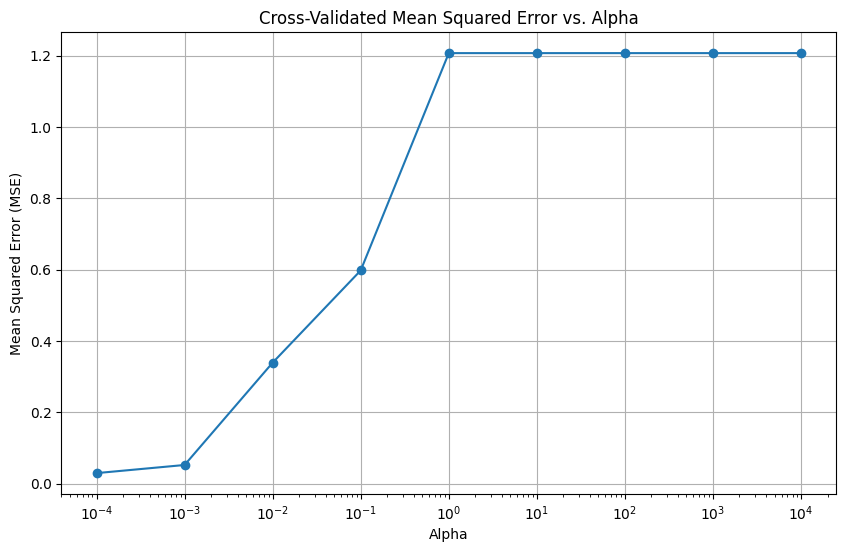

In [381]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.utils import resample


def loading_data():
    # x train
    custom_column_names = ["instance", "feature", "value"]
    df_train_x = pd.read_csv("train_X.csv", names=custom_column_names)
    df_pivot = df_train_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot["instance"] = df_pivot["instance"]
    # y train
    custom_Y_names = ["poisonous"]
    df_train_Y = pd.read_csv("train_Y.csv", names=custom_Y_names)

    # x test
    df_test_x = pd.read_csv("test_X.csv", names=custom_column_names)
    df_pivot_test = df_test_x.pivot(index="instance", columns="feature", values="value").fillna(0)

    # Reset the index to make "instance" a regular column
    df_pivot_test.reset_index(inplace=True)

    # Rename the columns for clarity (0 and 1 instead of 0.0 and 1.0)
    df_pivot_test.columns = [f"feature_{col}" if col != "instance" else col for col in df_pivot_test.columns]

    # Optional: Convert "instance" column to an integer (if it's not already)
    df_pivot_test["instance"] = df_pivot_test["instance"]

    # y test

    df_test_Y = pd.read_csv("test_Y.csv", names=custom_Y_names)

    # drop instance column
    df_pivot.drop('instance', axis=1, inplace=True)
    df_pivot_test.drop('instance', axis=1, inplace=True)

    return df_pivot, df_train_Y, df_pivot_test, df_test_Y


def SVM_l2_regularization_Kfold(x_train, y_train):
    class_weights = {-1: 1, 1: 5}

    k = 5  # Number of folds for cross-validation
    C_values = [0.001, 0.01, 0.1, 1, 10]
    mean_scores = []

    for c in C_values:
        svm_classifier = SVC(kernel='linear', C=c, class_weight=class_weights)
        kf = KFold(n_splits=k)
        scores = cross_val_score(svm_classifier, x_train, y_train, cv=kf)
        mean_accuracy = np.mean(scores)
        mean_scores.append(mean_accuracy)
        print(f'C={c}: Mean Accuracy = {mean_accuracy:.2f}')
    plt.figure(figsize=(8, 6))
    plt.plot(C_values, mean_scores, marker='o', linestyle='-')
    plt.title("Mean Accuracy vs. C Values")
    plt.xlabel("C Values")
    plt.ylabel("Mean Accuracy")
    plt.xscale('log')  # Use a log scale for the x-axis if C values vary widely
    plt.grid(True)
    plt.show()
    return mean_scores


def SVM_Prediction(x_train, y_train, x_test, y_test):
    class_weights = {-1: 1, 1: 5}
    svm_classifier = SVC(kernel='linear', C=0.01, class_weight=class_weights)
    svm_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = svm_classifier.predict(x_test)

    # Calculate and print the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    plt.figure(figsize=(8, 6))

    feature_names = x_train.columns

    coefficients = svm_classifier.coef_

    feature_coefficients = dict(zip(feature_names, coefficients[0]))  # Use coefficients[0] for class -1

    print(feature_coefficients)
    return feature_coefficients


def Lasso_Regularization(x_train, y_train, x_test, y_test):
    alpha = 0.01  # Adjust the regularization strength
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    selected_features = [feature for feature, coef in enumerate(lasso.coef_) if coef != 0]
    print(f'Selected features: {selected_features}')
    X_selected = x_train[:, selected_features]
    return X_selected


def BoLasso(x_train, y_train, alpha=0.01):
    n_bootstraps = 1000
    selected_features = []

    for _ in range(n_bootstraps):
        # Generate a bootstrap sample
        X_boot, y_boot = resample(x_train, y_train, random_state=np.random.randint(0, 100))

        # Fit a Lasso regression model
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_boot, y_boot)
        selected_indices = np.where(lasso.coef_ != 0)[0]
        selected_features.append(selected_indices)

    feature_selection_count = np.bincount(np.concatenate(selected_features))

    threshold = n_bootstraps // 2
    final_selected_features = np.where(feature_selection_count >= threshold)[0]

    print("Selected Features:", final_selected_features)
    #X_selected = x_train.iloc[:, final_selected_features]
    return final_selected_features


def Tuning_Lasso(x_train, y_train):
    alphas = np.logspace(-4, 4, 9)  # Varying from 0.0001 to 10,000

    # Create an empty list to store cross-validated scores
    cv_scores = []

    # Perform cross-validation for each alpha
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, max_iter=10000)
        scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_scores.append(-scores.mean())  # Convert to positive MSE values

    # Find the alpha with the lowest MSE
    best_alpha = alphas[cv_scores.index(min(cv_scores))]
    best_mse = min(cv_scores)

    print(f"Best alpha: {best_alpha}")
    print(f"Lowest MSE: {best_mse}")
    plt.figure(figsize=(10, 6))
    plt.semilogx(alphas, cv_scores, marker='o')
    plt.title('Cross-Validated Mean Squared Error vs. Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.show()
    return best_alpha


def main():
    x_train, y_train, x_test, y_test = loading_data()
    y_train = y_train.values.ravel()
    # extra_columns_in_train = [col for col in x_train.columns if col not in x_test.columns]
    # for col in extra_columns_in_train:
    #     x_test[col] = 0
    # mean_scores = SVM_l2_regularization_Kfold(x_train, y_train)
    extra_columns_in_test = [col for col in x_train.columns if col not in x_test.columns]

    # Drop these extra columns from the training dataset
    x_train.drop(extra_columns_in_test, axis=1, inplace=True)
    # feature_coefficients_SVM = SVM_Prediction(x_train, y_train, x_test, y_test)
    # Lasso_selected_features, X_Lasso_selected_features = BoLasso(x_train, y_train)
    # print(X_Lasso_selected_features)
    Tuning_Lasso(x_train, y_train)



if __name__ == "__main__":
    main()
